In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [4]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
303/303 [==============================] - 1s 4ms/sample - loss: 191.8838 - mean_absolute_error: 10.6134
Epoch 2/100
303/303 [==============================] - 0s 1ms/sample - loss: 31.1454 - mean_absolute_error: 3.7877
Epoch 3/100
303/303 [==============================] - 0s 1ms/sample - loss: 22.0953 - mean_absolute_error: 3.1081
Epoch 4/100
303/303 [==============================] - 0s 1ms/sample - loss: 19.2536 - mean_absolute_error: 2.8314
Epoch 5/100
303/303 [==============================] - 0s 1ms/sample - loss: 16.8093 - mean_absolute_error: 2.7096
Epoch 6/100
303/303 [==============================] - 0s 1ms/sample - loss: 15.4323 - mean_absolute_error: 2.6182
Epoch 7/100
303/303 [==============================] - 0s 1ms/sample - loss: 15.1377 - mean_absolute_error: 2.4870
Epoch 8/100
303/303 [==============================] - 

303/303 [==============================] - 0s 1ms/sample - loss: 5.1765 - mean_absolute_error: 1.5236
Epoch 69/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.2548 - mean_absolute_error: 1.5476
Epoch 70/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.6446 - mean_absolute_error: 1.5706
Epoch 71/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.6099 - mean_absolute_error: 1.5181
Epoch 72/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.5281 - mean_absolute_error: 1.5570
Epoch 73/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.7100 - mean_absolute_error: 1.5197
Epoch 74/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.9309 - mean_absolute_error: 1.5491
Epoch 75/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.5621 - mean_absolute_error: 1.5383
Epoch 76/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.2565 - mean_a

303/303 [==============================] - 0s 1ms/sample - loss: 7.4258 - mean_absolute_error: 1.8052
Epoch 39/100
303/303 [==============================] - 0s 1ms/sample - loss: 7.1054 - mean_absolute_error: 1.6934
Epoch 40/100
303/303 [==============================] - 0s 1ms/sample - loss: 7.0548 - mean_absolute_error: 1.7825
Epoch 41/100
303/303 [==============================] - 0s 1ms/sample - loss: 7.0927 - mean_absolute_error: 1.7244
Epoch 42/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.9561 - mean_absolute_error: 1.7300
Epoch 43/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.6591 - mean_absolute_error: 1.7475
Epoch 44/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.5770 - mean_absolute_error: 1.7444
Epoch 45/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.6801 - mean_absolute_error: 1.7273
Epoch 46/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.0444 - mean_a

303/303 [==============================] - 0s 1ms/sample - loss: 11.7821 - mean_absolute_error: 2.3550
Epoch 8/100
303/303 [==============================] - 0s 1ms/sample - loss: 10.9193 - mean_absolute_error: 2.2827
Epoch 9/100
303/303 [==============================] - 0s 1ms/sample - loss: 10.6816 - mean_absolute_error: 2.2509
Epoch 10/100
303/303 [==============================] - 0s 1ms/sample - loss: 10.0977 - mean_absolute_error: 2.2408
Epoch 11/100
303/303 [==============================] - 0s 1ms/sample - loss: 9.5062 - mean_absolute_error: 2.1445
Epoch 12/100
303/303 [==============================] - 0s 1ms/sample - loss: 9.6216 - mean_absolute_error: 2.0919
Epoch 13/100
303/303 [==============================] - 0s 1ms/sample - loss: 9.6662 - mean_absolute_error: 2.0926
Epoch 14/100
303/303 [==============================] - 0s 1ms/sample - loss: 8.6424 - mean_absolute_error: 2.0410
Epoch 15/100
303/303 [==============================] - 0s 1ms/sample - loss: 8.4518 - mean

303/303 [==============================] - 0s 1ms/sample - loss: 3.5528 - mean_absolute_error: 1.3606
Epoch 79/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.2044 - mean_absolute_error: 1.2759
Epoch 80/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.2350 - mean_absolute_error: 1.2976
Epoch 81/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.3175 - mean_absolute_error: 1.3261
Epoch 82/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.3476 - mean_absolute_error: 1.3318
Epoch 83/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.2527 - mean_absolute_error: 1.3085
Epoch 84/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.0787 - mean_absolute_error: 1.2856
Epoch 85/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.2323 - mean_absolute_error: 1.3134
Epoch 86/100
303/303 [==============================] - 0s 1ms/sample - loss: 3.1643 - mean_a

303/303 [==============================] - 0s 1ms/sample - loss: 5.9188 - mean_absolute_error: 1.6053
Epoch 49/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.9963 - mean_absolute_error: 1.6055
Epoch 50/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.7746 - mean_absolute_error: 1.5772
Epoch 51/100
303/303 [==============================] - ETA: 0s - loss: 6.2602 - mean_absolute_error: 1.553 - 0s 1ms/sample - loss: 6.1946 - mean_absolute_error: 1.5646
Epoch 52/100
303/303 [==============================] - 0s 1ms/sample - loss: 6.1003 - mean_absolute_error: 1.5883
Epoch 53/100
303/303 [==============================] - 0s 2ms/sample - loss: 5.5086 - mean_absolute_error: 1.5898
Epoch 54/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.9370 - mean_absolute_error: 1.5921
Epoch 55/100
303/303 [==============================] - 0s 1ms/sample - loss: 5.4613 - mean_absolute_error: 1.5580 0s - loss: 3.7550 - mean_absolute_error

In [5]:
all_scores

[2.1954443, 2.5527353, 2.5170004, 2.7952836]

In [6]:
np.mean(all_scores)

2.5151157

In [7]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)


processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 3ms/sample - loss: 214.2985 - mean_absolute_error: 11.1569 - val_loss: 39.3790 - val_mean_absolute_error: 4.5562
Epoch 2/500
303/303 [==============================] - 1s 2ms/sample - loss: 29.3145 - mean_absolute_error: 3.8497 - val_loss: 23.1787 - val_mean_absolute_error: 3.5075
Epoch 3/500
303/303 [==============================] - 0s 2ms/sample - loss: 20.5094 - mean_absolute_error: 3.1191 - val_loss: 15.8490 - val_mean_absolute_error: 2.7280
Epoch 4/500
303/303 [==============================] - 1s 2ms/sample - loss: 16.3748 - mean_absolute_error: 2.7982 - val_loss: 13.6379 - val_mean_absolute_error: 2.6888
Epoch 5/500
303/303 [==============================] - 1s 2ms/sample - loss: 14.8278 - mean_absolute_error: 2.6855 - val_loss: 13.0704 - val_mean_absolute_error: 2.4796
Epoch 6/500
303/303 [==============================] - 1s 2ms/sample - loss: 14.3111 - 

303/303 [==============================] - 1s 2ms/sample - loss: 6.5702 - mean_absolute_error: 1.6879 - val_loss: 8.7989 - val_mean_absolute_error: 2.0057
Epoch 50/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.3409 - mean_absolute_error: 1.6602 - val_loss: 8.8933 - val_mean_absolute_error: 2.0587
Epoch 51/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.4770 - mean_absolute_error: 1.6377 - val_loss: 8.4363 - val_mean_absolute_error: 2.0166
Epoch 52/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.2764 - mean_absolute_error: 1.6520 - val_loss: 10.1329 - val_mean_absolute_error: 2.0704
Epoch 53/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.3198 - mean_absolute_error: 1.6286 - val_loss: 8.7131 - val_mean_absolute_error: 2.2721
Epoch 54/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.2247 - mean_absolute_error: 1.5673 - val_loss: 8.1246 - val_mean_absolute_error: 1.9303
Epoc

Epoch 98/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.3534 - mean_absolute_error: 1.3985 - val_loss: 9.8166 - val_mean_absolute_error: 2.1073
Epoch 99/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.3216 - mean_absolute_error: 1.4060 - val_loss: 10.7887 - val_mean_absolute_error: 2.1886
Epoch 100/500
303/303 [==============================] - 0s 2ms/sample - loss: 4.1033 - mean_absolute_error: 1.3642 - val_loss: 9.7279 - val_mean_absolute_error: 2.2703
Epoch 101/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.3744 - mean_absolute_error: 1.3032 - val_loss: 9.8361 - val_mean_absolute_error: 2.1898
Epoch 102/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.0692 - mean_absolute_error: 1.3511 - val_loss: 10.4097 - val_mean_absolute_error: 2.1757
Epoch 103/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.2550 - mean_absolute_error: 1.3897 - val_loss: 9.6452 - val_mean_absolute_

303/303 [==============================] - 1s 2ms/sample - loss: 2.9442 - mean_absolute_error: 1.2056 - val_loss: 11.2542 - val_mean_absolute_error: 2.2418
Epoch 147/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.4398 - mean_absolute_error: 1.2492 - val_loss: 11.3700 - val_mean_absolute_error: 2.3645
Epoch 148/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1021 - mean_absolute_error: 1.2451 - val_loss: 10.4747 - val_mean_absolute_error: 2.2913
Epoch 149/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1492 - mean_absolute_error: 1.2232 - val_loss: 10.0071 - val_mean_absolute_error: 2.2759
Epoch 150/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.7518 - mean_absolute_error: 1.1335 - val_loss: 12.0101 - val_mean_absolute_error: 2.5846
Epoch 151/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.7181 - mean_absolute_error: 1.1801 - val_loss: 10.9226 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 2.2746 - mean_absolute_error: 1.0283 - val_loss: 14.8137 - val_mean_absolute_error: 2.6093
Epoch 195/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.4090 - mean_absolute_error: 1.0897 - val_loss: 11.5175 - val_mean_absolute_error: 2.2848
Epoch 196/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.1607 - mean_absolute_error: 1.0188 - val_loss: 11.0328 - val_mean_absolute_error: 2.2522
Epoch 197/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.9719 - mean_absolute_error: 1.0029 - val_loss: 12.5586 - val_mean_absolute_error: 2.4310
Epoch 198/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.1328 - mean_absolute_error: 0.9863 - val_loss: 13.6921 - val_mean_absolute_error: 2.5377
Epoch 199/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.0722 - mean_absolute_error: 1.0309 - val_loss: 13.6424 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.6512 - mean_absolute_error: 0.9069 - val_loss: 12.2803 - val_mean_absolute_error: 2.4727
Epoch 243/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.8227 - mean_absolute_error: 0.9709 - val_loss: 12.3178 - val_mean_absolute_error: 2.5617
Epoch 244/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.5955 - mean_absolute_error: 0.9503 - val_loss: 12.6656 - val_mean_absolute_error: 2.5520
Epoch 245/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.6659 - mean_absolute_error: 0.9257 - val_loss: 15.1932 - val_mean_absolute_error: 2.6355
Epoch 246/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6391 - mean_absolute_error: 0.9212 - val_loss: 13.6268 - val_mean_absolute_error: 2.5541
Epoch 247/500
303/303 [==============================] - ETA: 0s - loss: 1.6315 - mean_absolute_error: 0.899 - 1s 2ms/sample - loss: 1.6481 - mean_absolute_error: 0

Epoch 290/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4679 - mean_absolute_error: 0.8610 - val_loss: 12.9697 - val_mean_absolute_error: 2.4811
Epoch 291/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1790 - mean_absolute_error: 0.8201 - val_loss: 11.5751 - val_mean_absolute_error: 2.4257
Epoch 292/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6181 - mean_absolute_error: 0.8913 - val_loss: 13.0573 - val_mean_absolute_error: 2.5338
Epoch 293/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.2115 - mean_absolute_error: 0.7840 - val_loss: 12.9582 - val_mean_absolute_error: 2.5383
Epoch 294/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.3316 - mean_absolute_error: 0.8548 - val_loss: 11.3587 - val_mean_absolute_error: 2.4014
Epoch 295/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6330 - mean_absolute_error: 0.8344 - val_loss: 12.9640 - val_mean_abs

303/303 [==============================] - 0s 2ms/sample - loss: 1.1522 - mean_absolute_error: 0.7920 - val_loss: 11.2109 - val_mean_absolute_error: 2.2963
Epoch 339/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.2853 - mean_absolute_error: 0.8113 - val_loss: 13.0047 - val_mean_absolute_error: 2.4656
Epoch 340/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1692 - mean_absolute_error: 0.7511 - val_loss: 11.7820 - val_mean_absolute_error: 2.3995
Epoch 341/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.2302 - mean_absolute_error: 0.7951 - val_loss: 12.8208 - val_mean_absolute_error: 2.5194
Epoch 342/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2281 - mean_absolute_error: 0.7678 - val_loss: 13.9377 - val_mean_absolute_error: 2.5490
Epoch 343/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.1151 - mean_absolute_error: 0.7450 - val_loss: 13.7694 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.2130 - mean_absolute_error: 0.7826 - val_loss: 12.7671 - val_mean_absolute_error: 2.6479
Epoch 387/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1679 - mean_absolute_error: 0.7959 - val_loss: 11.7674 - val_mean_absolute_error: 2.4628
Epoch 388/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1051 - mean_absolute_error: 0.7683 - val_loss: 14.5577 - val_mean_absolute_error: 2.5332
Epoch 389/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9664 - mean_absolute_error: 0.7004 - val_loss: 12.7414 - val_mean_absolute_error: 2.4941
Epoch 390/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1297 - mean_absolute_error: 0.7636 - val_loss: 11.9235 - val_mean_absolute_error: 2.4860
Epoch 391/500
303/303 [==============================] - 0s 2ms/sample - loss: 0.9724 - mean_absolute_error: 0.7286 - val_loss: 14.3159 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.0039 - mean_absolute_error: 0.7116 - val_loss: 13.7298 - val_mean_absolute_error: 2.5045
Epoch 435/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1741 - mean_absolute_error: 0.7563 - val_loss: 13.1685 - val_mean_absolute_error: 2.5156
Epoch 436/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9008 - mean_absolute_error: 0.6671 - val_loss: 12.9995 - val_mean_absolute_error: 2.4759
Epoch 437/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9766 - mean_absolute_error: 0.7112 - val_loss: 11.4809 - val_mean_absolute_error: 2.4588
Epoch 438/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0125 - mean_absolute_error: 0.7231 - val_loss: 13.0359 - val_mean_absolute_error: 2.5691
Epoch 439/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0233 - mean_absolute_error: 0.7179 - val_loss: 12.7581 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.8597 - mean_absolute_error: 0.6660 - val_loss: 13.1525 - val_mean_absolute_error: 2.5898
Epoch 483/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9175 - mean_absolute_error: 0.6846 - val_loss: 11.3401 - val_mean_absolute_error: 2.4645
Epoch 484/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9606 - mean_absolute_error: 0.6912 - val_loss: 9.6000 - val_mean_absolute_error: 2.2625
Epoch 485/500
303/303 [==============================] - 0s 2ms/sample - loss: 0.8337 - mean_absolute_error: 0.6823 - val_loss: 11.0642 - val_mean_absolute_error: 2.4177
Epoch 486/500
303/303 [==============================] - 0s 2ms/sample - loss: 0.9432 - mean_absolute_error: 0.7046 - val_loss: 13.7319 - val_mean_absolute_error: 2.5487
Epoch 487/500
303/303 [==============================] - 0s 2ms/sample - loss: 0.9064 - mean_absolute_error: 0.6841 - val_loss: 12.6835 - val_mean_absolute_error: 2.

303/303 [==============================] - 1s 2ms/sample - loss: 8.4638 - mean_absolute_error: 1.9140 - val_loss: 10.6290 - val_mean_absolute_error: 2.4049
Epoch 31/500
303/303 [==============================] - 1s 2ms/sample - loss: 8.1916 - mean_absolute_error: 1.8503 - val_loss: 11.2206 - val_mean_absolute_error: 2.5474
Epoch 32/500
303/303 [==============================] - 1s 2ms/sample - loss: 7.9139 - mean_absolute_error: 1.8442 - val_loss: 10.0299 - val_mean_absolute_error: 2.3979
Epoch 33/500
303/303 [==============================] - 1s 2ms/sample - loss: 8.1398 - mean_absolute_error: 1.8398 - val_loss: 10.4277 - val_mean_absolute_error: 2.4786
Epoch 34/500
303/303 [==============================] - 1s 2ms/sample - loss: 8.1186 - mean_absolute_error: 1.9040 - val_loss: 12.0672 - val_mean_absolute_error: 2.6963
Epoch 35/500
303/303 [==============================] - 1s 2ms/sample - loss: 7.2713 - mean_absolute_error: 1.7875 - val_loss: 13.3576 - val_mean_absolute_error: 2.8182

303/303 [==============================] - 1s 2ms/sample - loss: 4.7756 - mean_absolute_error: 1.4661 - val_loss: 11.6383 - val_mean_absolute_error: 2.5409
Epoch 79/500
303/303 [==============================] - 1s 2ms/sample - loss: 5.0333 - mean_absolute_error: 1.4295 - val_loss: 14.8034 - val_mean_absolute_error: 2.9542
Epoch 80/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.7011 - mean_absolute_error: 1.4475 - val_loss: 14.2698 - val_mean_absolute_error: 2.6704
Epoch 81/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.4207 - mean_absolute_error: 1.4103 - val_loss: 24.5875 - val_mean_absolute_error: 3.5276
Epoch 82/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.0124 - mean_absolute_error: 1.4407 - val_loss: 11.6003 - val_mean_absolute_error: 2.5318
Epoch 83/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.8065 - mean_absolute_error: 1.4383 - val_loss: 11.2160 - val_mean_absolute_error: 2.4905

303/303 [==============================] - 1s 2ms/sample - loss: 3.1842 - mean_absolute_error: 1.2370 - val_loss: 18.1079 - val_mean_absolute_error: 2.8447
Epoch 127/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.0982 - mean_absolute_error: 1.2217 - val_loss: 12.5334 - val_mean_absolute_error: 2.4910
Epoch 128/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1201 - mean_absolute_error: 1.2392 - val_loss: 17.2189 - val_mean_absolute_error: 3.0149
Epoch 129/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.2252 - mean_absolute_error: 1.2152 - val_loss: 16.2529 - val_mean_absolute_error: 2.6553
Epoch 130/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1919 - mean_absolute_error: 1.2467 - val_loss: 20.1985 - val_mean_absolute_error: 2.8559
Epoch 131/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.8283 - mean_absolute_error: 1.1820 - val_loss: 23.9459 - val_mean_absolute_error: 3

303/303 [==============================] - 1s 2ms/sample - loss: 2.2033 - mean_absolute_error: 1.0452 - val_loss: 17.9108 - val_mean_absolute_error: 2.7912
Epoch 175/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.2161 - mean_absolute_error: 1.0576 - val_loss: 13.8216 - val_mean_absolute_error: 2.7319
Epoch 176/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.1985 - mean_absolute_error: 1.0501 - val_loss: 19.7602 - val_mean_absolute_error: 2.9582
Epoch 177/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.1700 - mean_absolute_error: 1.0244 - val_loss: 17.2197 - val_mean_absolute_error: 2.9589
Epoch 178/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.3197 - mean_absolute_error: 1.0920 - val_loss: 19.5088 - val_mean_absolute_error: 3.0410
Epoch 179/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.1365 - mean_absolute_error: 1.0739 - val_loss: 19.7946 - val_mean_absolute_error: 3

303/303 [==============================] - 1s 2ms/sample - loss: 1.4925 - mean_absolute_error: 0.8803 - val_loss: 22.4409 - val_mean_absolute_error: 3.0624
Epoch 223/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6384 - mean_absolute_error: 0.9757 - val_loss: 16.2362 - val_mean_absolute_error: 2.6986
Epoch 224/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.8518 - mean_absolute_error: 0.9895 - val_loss: 23.8630 - val_mean_absolute_error: 3.1106
Epoch 225/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4689 - mean_absolute_error: 0.9268 - val_loss: 21.5713 - val_mean_absolute_error: 2.7292
Epoch 226/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.7566 - mean_absolute_error: 0.9852 - val_loss: 26.6233 - val_mean_absolute_error: 3.3261
Epoch 227/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6208 - mean_absolute_error: 0.8833 - val_loss: 24.3383 - val_mean_absolute_error: 3

303/303 [==============================] - 1s 2ms/sample - loss: 1.3620 - mean_absolute_error: 0.8357 - val_loss: 18.1845 - val_mean_absolute_error: 2.8804
Epoch 271/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4043 - mean_absolute_error: 0.8826 - val_loss: 19.0040 - val_mean_absolute_error: 2.9945
Epoch 272/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.3140 - mean_absolute_error: 0.8535 - val_loss: 20.4136 - val_mean_absolute_error: 3.0335
Epoch 273/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2865 - mean_absolute_error: 0.8467 - val_loss: 15.5021 - val_mean_absolute_error: 2.7649
Epoch 274/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4236 - mean_absolute_error: 0.8794 - val_loss: 14.1804 - val_mean_absolute_error: 2.6778
Epoch 275/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.5235 - mean_absolute_error: 0.8863 - val_loss: 22.4793 - val_mean_absolute_error: 3

303/303 [==============================] - 1s 2ms/sample - loss: 1.1114 - mean_absolute_error: 0.7638 - val_loss: 24.5575 - val_mean_absolute_error: 3.1175
Epoch 319/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2268 - mean_absolute_error: 0.7912 - val_loss: 19.0003 - val_mean_absolute_error: 3.0458
Epoch 320/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2637 - mean_absolute_error: 0.8503 - val_loss: 14.6280 - val_mean_absolute_error: 2.7113
Epoch 321/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2559 - mean_absolute_error: 0.8094 - val_loss: 18.0561 - val_mean_absolute_error: 3.0270
Epoch 322/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1880 - mean_absolute_error: 0.8045 - val_loss: 23.6898 - val_mean_absolute_error: 3.0408
Epoch 323/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2264 - mean_absolute_error: 0.7853 - val_loss: 16.8000 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.9904 - mean_absolute_error: 0.7648 - val_loss: 16.1464 - val_mean_absolute_error: 2.7455
Epoch 367/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1871 - mean_absolute_error: 0.7625 - val_loss: 14.9221 - val_mean_absolute_error: 2.6949
Epoch 368/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0235 - mean_absolute_error: 0.7372 - val_loss: 19.4547 - val_mean_absolute_error: 2.8034
Epoch 369/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9919 - mean_absolute_error: 0.7197 - val_loss: 14.7485 - val_mean_absolute_error: 2.7985
Epoch 370/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0479 - mean_absolute_error: 0.7411 - val_loss: 17.1923 - val_mean_absolute_error: 2.8954
Epoch 371/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.1383 - mean_absolute_error: 0.7668 - val_loss: 20.6947 - val_mean_absolute_error: 3

303/303 [==============================] - 0s 2ms/sample - loss: 0.8324 - mean_absolute_error: 0.6765 - val_loss: 16.5823 - val_mean_absolute_error: 2.8336
Epoch 415/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9976 - mean_absolute_error: 0.7209 - val_loss: 17.9887 - val_mean_absolute_error: 3.0039
Epoch 416/500
303/303 [==============================] - 0s 2ms/sample - loss: 0.9016 - mean_absolute_error: 0.7158 - val_loss: 15.6568 - val_mean_absolute_error: 2.7542
Epoch 417/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9807 - mean_absolute_error: 0.7272 - val_loss: 20.1965 - val_mean_absolute_error: 3.1665
Epoch 418/500
303/303 [==============================] - 0s 2ms/sample - loss: 0.9464 - mean_absolute_error: 0.7027 - val_loss: 15.8148 - val_mean_absolute_error: 2.8611
Epoch 419/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9897 - mean_absolute_error: 0.7139 - val_loss: 14.2435 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 2ms/sample - loss: 0.7924 - mean_absolute_error: 0.6538 - val_loss: 11.6208 - val_mean_absolute_error: 2.4657
Epoch 463/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8484 - mean_absolute_error: 0.6808 - val_loss: 19.3349 - val_mean_absolute_error: 3.1210
Epoch 464/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8584 - mean_absolute_error: 0.6744 - val_loss: 21.0421 - val_mean_absolute_error: 3.1168
Epoch 465/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8037 - mean_absolute_error: 0.6636 - val_loss: 12.8829 - val_mean_absolute_error: 2.5999
Epoch 466/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8376 - mean_absolute_error: 0.6760 - val_loss: 14.2048 - val_mean_absolute_error: 2.8124
Epoch 467/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7889 - mean_absolute_error: 0.6740 - val_loss: 20.8040 - val_mean_absolute_error: 3

Epoch 10/500
303/303 [==============================] - 1s 2ms/sample - loss: 9.4911 - mean_absolute_error: 2.0781 - val_loss: 15.4886 - val_mean_absolute_error: 2.6471
Epoch 11/500
303/303 [==============================] - 1s 2ms/sample - loss: 9.1355 - mean_absolute_error: 2.0414 - val_loss: 15.1009 - val_mean_absolute_error: 2.5432
Epoch 12/500
303/303 [==============================] - 1s 2ms/sample - loss: 9.2423 - mean_absolute_error: 2.0950 - val_loss: 14.5958 - val_mean_absolute_error: 2.4605
Epoch 13/500
303/303 [==============================] - 1s 2ms/sample - loss: 8.2347 - mean_absolute_error: 2.0886 - val_loss: 15.4018 - val_mean_absolute_error: 2.5895
Epoch 14/500
303/303 [==============================] - 1s 2ms/sample - loss: 8.2252 - mean_absolute_error: 1.9975 - val_loss: 17.2911 - val_mean_absolute_error: 2.6784
Epoch 15/500
303/303 [==============================] - 1s 2ms/sample - loss: 7.9270 - mean_absolute_error: 1.9801 - val_loss: 15.1439 - val_mean_absolute_

303/303 [==============================] - 0s 2ms/sample - loss: 4.9204 - mean_absolute_error: 1.5576 - val_loss: 14.6527 - val_mean_absolute_error: 2.3730
Epoch 59/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.5961 - mean_absolute_error: 1.4738 - val_loss: 16.5165 - val_mean_absolute_error: 2.6846
Epoch 60/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.6325 - mean_absolute_error: 1.5045 - val_loss: 14.5997 - val_mean_absolute_error: 2.3494
Epoch 61/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.6415 - mean_absolute_error: 1.5279 - val_loss: 15.5680 - val_mean_absolute_error: 2.4166
Epoch 62/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.7098 - mean_absolute_error: 1.5334 - val_loss: 16.1691 - val_mean_absolute_error: 2.5639
Epoch 63/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.4725 - mean_absolute_error: 1.4746 - val_loss: 16.5236 - val_mean_absolute_error: 2.5065

303/303 [==============================] - 1s 2ms/sample - loss: 3.0138 - mean_absolute_error: 1.2368 - val_loss: 17.0773 - val_mean_absolute_error: 2.7296
Epoch 107/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.8036 - mean_absolute_error: 1.2342 - val_loss: 17.5251 - val_mean_absolute_error: 2.8327
Epoch 108/500
303/303 [==============================] - 0s 2ms/sample - loss: 3.1825 - mean_absolute_error: 1.2935 - val_loss: 17.0866 - val_mean_absolute_error: 2.8656
Epoch 109/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.9449 - mean_absolute_error: 1.2488 - val_loss: 15.3895 - val_mean_absolute_error: 2.5839
Epoch 110/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.9850 - mean_absolute_error: 1.3021 - val_loss: 15.9222 - val_mean_absolute_error: 2.6083
Epoch 111/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.6617 - mean_absolute_error: 1.1960 - val_loss: 17.8169 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 2.1541 - mean_absolute_error: 1.0766 - val_loss: 14.7695 - val_mean_absolute_error: 2.5899
Epoch 155/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.1341 - mean_absolute_error: 1.1099 - val_loss: 15.1327 - val_mean_absolute_error: 2.6199
Epoch 156/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.1028 - mean_absolute_error: 1.0677 - val_loss: 14.5028 - val_mean_absolute_error: 2.5851
Epoch 157/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.9766 - mean_absolute_error: 1.0265 - val_loss: 13.8061 - val_mean_absolute_error: 2.5267
Epoch 158/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.2092 - mean_absolute_error: 1.0689 - val_loss: 13.9160 - val_mean_absolute_error: 2.5393
Epoch 159/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.9856 - mean_absolute_error: 1.0360 - val_loss: 15.9815 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.6757 - mean_absolute_error: 0.9314 - val_loss: 14.7283 - val_mean_absolute_error: 2.7997
Epoch 203/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4774 - mean_absolute_error: 0.8739 - val_loss: 14.7346 - val_mean_absolute_error: 2.6940
Epoch 204/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.5206 - mean_absolute_error: 0.8896 - val_loss: 14.8237 - val_mean_absolute_error: 2.7594
Epoch 205/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.7016 - mean_absolute_error: 0.9574 - val_loss: 13.4134 - val_mean_absolute_error: 2.5890
Epoch 206/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.5461 - mean_absolute_error: 0.9253 - val_loss: 13.1797 - val_mean_absolute_error: 2.5006
Epoch 207/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6601 - mean_absolute_error: 0.9420 - val_loss: 13.9687 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.2018 - mean_absolute_error: 0.8270 - val_loss: 15.9622 - val_mean_absolute_error: 2.8790
Epoch 251/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.3750 - mean_absolute_error: 0.8844 - val_loss: 16.5090 - val_mean_absolute_error: 2.7557
Epoch 252/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.3569 - mean_absolute_error: 0.8416 - val_loss: 13.5944 - val_mean_absolute_error: 2.5320
Epoch 253/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4332 - mean_absolute_error: 0.8974 - val_loss: 14.2907 - val_mean_absolute_error: 2.6378
Epoch 254/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2424 - mean_absolute_error: 0.7911 - val_loss: 14.6740 - val_mean_absolute_error: 2.6934
Epoch 255/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4215 - mean_absolute_error: 0.8403 - val_loss: 13.1959 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.1553 - mean_absolute_error: 0.7898 - val_loss: 14.1398 - val_mean_absolute_error: 2.6621
Epoch 299/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1299 - mean_absolute_error: 0.7882 - val_loss: 13.9375 - val_mean_absolute_error: 2.6004
Epoch 300/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0892 - mean_absolute_error: 0.7556 - val_loss: 13.1722 - val_mean_absolute_error: 2.5597
Epoch 301/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9712 - mean_absolute_error: 0.7209 - val_loss: 16.1513 - val_mean_absolute_error: 2.8038
Epoch 302/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1612 - mean_absolute_error: 0.7728 - val_loss: 14.1021 - val_mean_absolute_error: 2.6092
Epoch 303/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2381 - mean_absolute_error: 0.7733 - val_loss: 14.6733 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.9349 - mean_absolute_error: 0.7078 - val_loss: 14.5689 - val_mean_absolute_error: 2.6756
Epoch 347/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0116 - mean_absolute_error: 0.7446 - val_loss: 15.2289 - val_mean_absolute_error: 2.7697
Epoch 348/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0059 - mean_absolute_error: 0.7359 - val_loss: 13.5397 - val_mean_absolute_error: 2.7091
Epoch 349/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9368 - mean_absolute_error: 0.7058 - val_loss: 14.6623 - val_mean_absolute_error: 2.6721
Epoch 350/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8915 - mean_absolute_error: 0.7035 - val_loss: 14.6462 - val_mean_absolute_error: 2.6002
Epoch 351/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9388 - mean_absolute_error: 0.7213 - val_loss: 14.3168 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.7538 - mean_absolute_error: 0.6486 - val_loss: 14.5304 - val_mean_absolute_error: 2.6901
Epoch 395/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7725 - mean_absolute_error: 0.6618 - val_loss: 15.4352 - val_mean_absolute_error: 2.7169
Epoch 396/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8664 - mean_absolute_error: 0.6637 - val_loss: 14.8646 - val_mean_absolute_error: 2.7436
Epoch 397/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8023 - mean_absolute_error: 0.6471 - val_loss: 14.5989 - val_mean_absolute_error: 2.7471
Epoch 398/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9112 - mean_absolute_error: 0.7137 - val_loss: 14.7581 - val_mean_absolute_error: 2.6810
Epoch 399/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8167 - mean_absolute_error: 0.6854 - val_loss: 14.7410 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.7612 - mean_absolute_error: 0.6222 - val_loss: 13.5810 - val_mean_absolute_error: 2.5888
Epoch 443/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7473 - mean_absolute_error: 0.6176 - val_loss: 14.5185 - val_mean_absolute_error: 2.6435
Epoch 444/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7559 - mean_absolute_error: 0.6556 - val_loss: 15.3532 - val_mean_absolute_error: 2.7271
Epoch 445/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8593 - mean_absolute_error: 0.6607 - val_loss: 13.8840 - val_mean_absolute_error: 2.6017
Epoch 446/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7371 - mean_absolute_error: 0.6191 - val_loss: 15.3713 - val_mean_absolute_error: 2.7414
Epoch 447/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7383 - mean_absolute_error: 0.6448 - val_loss: 14.1757 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.6737 - mean_absolute_error: 0.5887 - val_loss: 14.5193 - val_mean_absolute_error: 2.6673
Epoch 491/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8505 - mean_absolute_error: 0.6507 - val_loss: 14.4773 - val_mean_absolute_error: 2.7100
Epoch 492/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7093 - mean_absolute_error: 0.6077 - val_loss: 15.5212 - val_mean_absolute_error: 2.7705
Epoch 493/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.7594 - mean_absolute_error: 0.6375 - val_loss: 14.4166 - val_mean_absolute_error: 2.6756
Epoch 494/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.6011 - mean_absolute_error: 0.5691 - val_loss: 15.1454 - val_mean_absolute_error: 2.7566
Epoch 495/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.6741 - mean_absolute_error: 0.6090 - val_loss: 13.9078 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 6.6388 - mean_absolute_error: 1.7582 - val_loss: 16.0517 - val_mean_absolute_error: 2.5656
Epoch 39/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.7736 - mean_absolute_error: 1.6943 - val_loss: 16.0479 - val_mean_absolute_error: 2.8055
Epoch 40/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.7364 - mean_absolute_error: 1.6959 - val_loss: 13.4748 - val_mean_absolute_error: 2.3898
Epoch 41/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.9078 - mean_absolute_error: 1.7093 - val_loss: 15.9205 - val_mean_absolute_error: 2.8013
Epoch 42/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.3909 - mean_absolute_error: 1.6631 - val_loss: 12.8146 - val_mean_absolute_error: 2.4964
Epoch 43/500
303/303 [==============================] - 1s 2ms/sample - loss: 6.8727 - mean_absolute_error: 1.7055 - val_loss: 16.2387 - val_mean_absolute_error: 2.7110

303/303 [==============================] - 1s 2ms/sample - loss: 4.3800 - mean_absolute_error: 1.3395 - val_loss: 12.4164 - val_mean_absolute_error: 2.5550
Epoch 87/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.5132 - mean_absolute_error: 1.3994 - val_loss: 11.1827 - val_mean_absolute_error: 2.3751
Epoch 88/500
303/303 [==============================] - 0s 2ms/sample - loss: 4.1911 - mean_absolute_error: 1.3292 - val_loss: 12.3488 - val_mean_absolute_error: 2.5111
Epoch 89/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.3329 - mean_absolute_error: 1.3329 - val_loss: 13.3549 - val_mean_absolute_error: 2.5610
Epoch 90/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.4798 - mean_absolute_error: 1.3327 - val_loss: 12.2933 - val_mean_absolute_error: 2.4355
Epoch 91/500
303/303 [==============================] - 1s 2ms/sample - loss: 4.4168 - mean_absolute_error: 1.4063 - val_loss: 11.1471 - val_mean_absolute_error: 2.3765

303/303 [==============================] - 1s 2ms/sample - loss: 3.3581 - mean_absolute_error: 1.1650 - val_loss: 11.7981 - val_mean_absolute_error: 2.3932
Epoch 135/500
303/303 [==============================] - 0s 2ms/sample - loss: 3.1318 - mean_absolute_error: 1.1398 - val_loss: 12.5368 - val_mean_absolute_error: 2.5275
Epoch 136/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1963 - mean_absolute_error: 1.1795 - val_loss: 11.3263 - val_mean_absolute_error: 2.4042
Epoch 137/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1466 - mean_absolute_error: 1.1397 - val_loss: 10.9944 - val_mean_absolute_error: 2.3518
Epoch 138/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.1963 - mean_absolute_error: 1.1728 - val_loss: 11.5010 - val_mean_absolute_error: 2.3765
Epoch 139/500
303/303 [==============================] - 1s 2ms/sample - loss: 3.2225 - mean_absolute_error: 1.1733 - val_loss: 12.4079 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 2.2142 - mean_absolute_error: 1.0512 - val_loss: 11.9437 - val_mean_absolute_error: 2.3872
Epoch 183/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.3379 - mean_absolute_error: 1.0540 - val_loss: 17.5920 - val_mean_absolute_error: 3.0754
Epoch 184/500
303/303 [==============================] - 0s 2ms/sample - loss: 2.5198 - mean_absolute_error: 1.0549 - val_loss: 14.2582 - val_mean_absolute_error: 2.5560
Epoch 185/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.3111 - mean_absolute_error: 1.0470 - val_loss: 13.9038 - val_mean_absolute_error: 2.6665
Epoch 186/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.4145 - mean_absolute_error: 1.1041 - val_loss: 13.9434 - val_mean_absolute_error: 2.5848
Epoch 187/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.3529 - mean_absolute_error: 1.0510 - val_loss: 12.5518 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.8386 - mean_absolute_error: 0.9716 - val_loss: 14.6543 - val_mean_absolute_error: 2.6254
Epoch 231/500
303/303 [==============================] - 1s 2ms/sample - loss: 2.0497 - mean_absolute_error: 0.9940 - val_loss: 14.5259 - val_mean_absolute_error: 2.5711
Epoch 232/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.7997 - mean_absolute_error: 0.9217 - val_loss: 14.9889 - val_mean_absolute_error: 2.7171
Epoch 233/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.9981 - mean_absolute_error: 0.9962 - val_loss: 14.8256 - val_mean_absolute_error: 2.6384
Epoch 234/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.8783 - mean_absolute_error: 0.9776 - val_loss: 14.3619 - val_mean_absolute_error: 2.5551
Epoch 235/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.6481 - mean_absolute_error: 0.9308 - val_loss: 14.5117 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.8021 - mean_absolute_error: 0.9348 - val_loss: 14.0530 - val_mean_absolute_error: 2.4821
Epoch 279/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4360 - mean_absolute_error: 0.8340 - val_loss: 13.9062 - val_mean_absolute_error: 2.5094
Epoch 280/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4928 - mean_absolute_error: 0.8358 - val_loss: 14.4646 - val_mean_absolute_error: 2.5140
Epoch 281/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.4300 - mean_absolute_error: 0.8459 - val_loss: 14.2118 - val_mean_absolute_error: 2.5140
Epoch 282/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.4437 - mean_absolute_error: 0.8711 - val_loss: 16.4775 - val_mean_absolute_error: 2.7665
Epoch 283/500
303/303 [==============================] - 0s 2ms/sample - loss: 1.5293 - mean_absolute_error: 0.9092 - val_loss: 13.9411 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.2173 - mean_absolute_error: 0.8377 - val_loss: 16.6881 - val_mean_absolute_error: 2.7497
Epoch 327/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2962 - mean_absolute_error: 0.8517 - val_loss: 16.2780 - val_mean_absolute_error: 2.6636
Epoch 328/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.3397 - mean_absolute_error: 0.8437 - val_loss: 16.1176 - val_mean_absolute_error: 2.6682
Epoch 329/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1311 - mean_absolute_error: 0.7562 - val_loss: 15.3946 - val_mean_absolute_error: 2.7082
Epoch 330/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2957 - mean_absolute_error: 0.8561 - val_loss: 15.6244 - val_mean_absolute_error: 2.6333
Epoch 331/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.3004 - mean_absolute_error: 0.8272 - val_loss: 16.6694 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 1.0427 - mean_absolute_error: 0.7627 - val_loss: 19.3075 - val_mean_absolute_error: 3.0433
Epoch 375/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1330 - mean_absolute_error: 0.7875 - val_loss: 15.7488 - val_mean_absolute_error: 2.5619
Epoch 376/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.2306 - mean_absolute_error: 0.8296 - val_loss: 16.4891 - val_mean_absolute_error: 2.6351
Epoch 377/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0552 - mean_absolute_error: 0.7505 - val_loss: 15.6425 - val_mean_absolute_error: 2.5785
Epoch 378/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1997 - mean_absolute_error: 0.7762 - val_loss: 16.6284 - val_mean_absolute_error: 2.6291
Epoch 379/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.1167 - mean_absolute_error: 0.7675 - val_loss: 15.5873 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.9310 - mean_absolute_error: 0.7122 - val_loss: 16.2730 - val_mean_absolute_error: 2.5463
Epoch 423/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9579 - mean_absolute_error: 0.7318 - val_loss: 16.9393 - val_mean_absolute_error: 2.7020
Epoch 424/500
303/303 [==============================] - 1s 2ms/sample - loss: 1.0186 - mean_absolute_error: 0.7325 - val_loss: 15.6942 - val_mean_absolute_error: 2.6151
Epoch 425/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9763 - mean_absolute_error: 0.7401 - val_loss: 15.6812 - val_mean_absolute_error: 2.6064
Epoch 426/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9175 - mean_absolute_error: 0.7297 - val_loss: 16.0183 - val_mean_absolute_error: 2.6375
Epoch 427/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8558 - mean_absolute_error: 0.7082 - val_loss: 15.1568 - val_mean_absolute_error: 2

303/303 [==============================] - 1s 2ms/sample - loss: 0.8035 - mean_absolute_error: 0.6920 - val_loss: 15.5325 - val_mean_absolute_error: 2.4858
Epoch 471/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8582 - mean_absolute_error: 0.6674 - val_loss: 15.3409 - val_mean_absolute_error: 2.5404
Epoch 472/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8614 - mean_absolute_error: 0.6952 - val_loss: 15.3788 - val_mean_absolute_error: 2.5387
Epoch 473/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.9203 - mean_absolute_error: 0.7054 - val_loss: 17.8955 - val_mean_absolute_error: 2.8679
Epoch 474/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8990 - mean_absolute_error: 0.7040 - val_loss: 15.1641 - val_mean_absolute_error: 2.4839
Epoch 475/500
303/303 [==============================] - 1s 2ms/sample - loss: 0.8900 - mean_absolute_error: 0.6855 - val_loss: 14.2998 - val_mean_absolute_error: 2

In [9]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

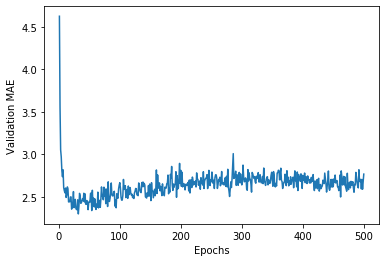

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
            return smoothed_points
        smooth_mae_history = smooth_curve(average_mae_history[10:])
        plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
        plt.xlabel('Epochs')
        plt.ylabel(('Validation MAE')
        plt.show()   

                   





SyntaxError: invalid syntax (<ipython-input-20-7171d8571ef9>, line 14)